In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**checking the number missing values in each column**


In [6]:
credit_card_data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Distribution of legit and fraudulent transactions**

In [7]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


**Separating the data for analysis**

In [8]:
legit= credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print (legit.shape)
print (fraud.shape)

(284315, 31)
(492, 31)


**Statistical measures of the data**

In [10]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [11]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


**Compare the values of both classes**

In [12]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under-Sampling**   

Undersampling is a data balancing technique in machine learning that reduces the number of samples in the majority class to match the minority class, preventing models from being biased towards the overrepresented group, but risks losing important data; it's also a signal processing concept where a signal is sampled too slowly, causing aliasing and potential reconstruction failure.

Build a sample dataset containing similar distributions of legit and fraud transaction


In [13]:
legit_sample = legit.sample(n=492)

Concatenating two Dataframes   

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282190,170721.0,2.110623,-0.023388,-1.366754,0.234560,0.288233,-0.764382,0.224155,-0.331032,0.476865,...,-0.328279,-0.776322,0.235691,-0.694704,-0.173114,0.239718,-0.067224,-0.065450,4.49,0
161177,113951.0,1.685085,-1.655439,0.136296,-0.507348,-0.702447,2.803634,-1.964904,1.018760,2.784981,...,0.176730,0.965237,0.149451,-0.838658,-0.607583,1.065052,0.048538,-0.052400,75.55,0
244379,152326.0,-0.610973,1.225544,-0.388067,-1.299843,1.113375,-0.034552,1.188310,-0.308977,1.014308,...,-0.539310,-0.835973,-0.126508,-1.438695,-0.220274,0.171682,0.337353,-0.137380,8.93,0
232399,147154.0,2.032382,-0.540889,-0.787956,0.025334,-0.039899,0.750224,-0.845397,0.259309,1.087361,...,0.134429,0.538963,0.057386,-0.296850,-0.153131,0.582177,-0.029955,-0.061171,8.72,0
8459,11345.0,-0.479384,1.171791,1.936276,0.302916,-0.188225,-1.149177,0.671154,-0.218445,0.752295,...,-0.329328,-0.630724,0.069458,0.854886,-0.261689,-0.002832,0.240158,0.122516,9.57,0


In [15]:
new_dataset.value_counts('Class')

,count
Class,
0,492
1,492


In [16]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98148.292683,0.042395,-0.000374,0.118384,-0.017723,0.041784,0.021908,-0.008001,0.078856,-0.043186,...,-0.011566,-0.029934,-0.093980,0.012261,0.009815,0.029645,-0.002415,-0.000401,0.016421,75.346667
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting the data into features and targets**

In [17]:
X=  new_dataset.drop(columns='Class', axis=1)
Y= new_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
224207  143696.0 -1.112078  1.685156  1.192703  4.618954 -0.606477  1.001561   
215167  139962.0  1.587823 -1.224863 -3.196732 -0.740864  0.425632 -1.333373   
143971   85767.0  1.313447  0.758185 -0.742912  0.741138  0.495367 -1.135424   
9540     14271.0 -1.032098 -0.726162  2.312770 -1.421518 -0.267646  0.431689   
229327  145881.0  0.059215  0.713758 -2.023080 -2.200698  3.754409  2.782629   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [18]:
print(Y)

224207    0
215167    0
143971    0
9540      0
229327    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Split the data into training and testing data**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, stratify=Y, random_state=2)


In [20]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (196, 30) (788, 30)


**Model Training**

**Logistic Regression**

In [21]:
model= LogisticRegression()

In [22]:
model.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

**Accuracy Score**

In [23]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [24]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9693877551020408


In [25]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9276649746192893


**Aggregating Prediction**

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

**Evaluating it's performance**

Model Evaluation Metrics:
Accuracy: 0.9264
Precision: 0.9828
Recall: 0.8680
F1-Score: 0.9218
Matthews Correlation Coefficient: 0.8587


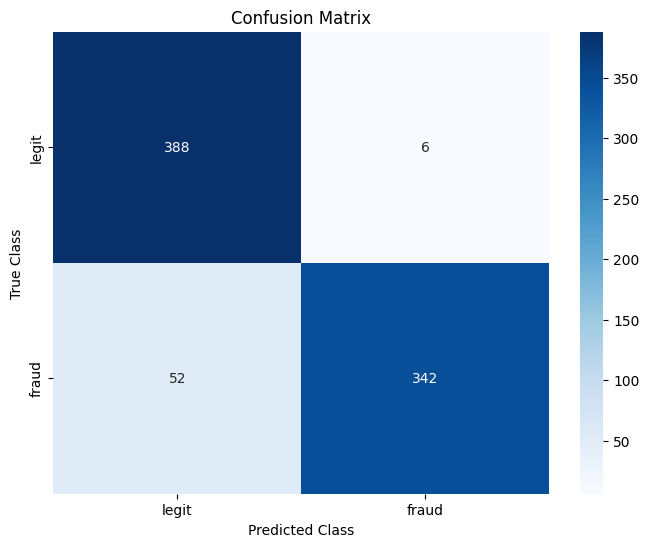

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
mcc = matthews_corrcoef(Y_test, Y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['legit', 'fraud'], yticklabels=['legit', 'fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**XGBoost**

In [29]:
import xgboost as xgb


In [39]:
from xgboost import XGBClassifier


In [40]:
reg= xgb.XGBRegressor(base_score= 0.5, booster= 'gbtree',
                      n_estimators= 1000, early_stopping_rounds= 50,
                      objective= 'binary:logistic',max_depth= 3,learning_rate= 0.01)
reg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)],
        verbose=100)

[0]	validation_0-logloss:0.68456	validation_1-logloss:0.68557
[100]	validation_0-logloss:0.25577	validation_1-logloss:0.33430
[200]	validation_0-logloss:0.12102	validation_1-logloss:0.25128
[300]	validation_0-logloss:0.06774	validation_1-logloss:0.22269
[400]	validation_0-logloss:0.04339	validation_1-logloss:0.21085
[500]	validation_0-logloss:0.03177	validation_1-logloss:0.20761
[565]	validation_0-logloss:0.02714	validation_1-logloss:0.20774


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation Metrics:
Accuracy: 0.9251
Precision: 0.9772
Recall: 0.8706
F1-Score: 0.9208
Matthews Correlation Coefficient: 0.8554


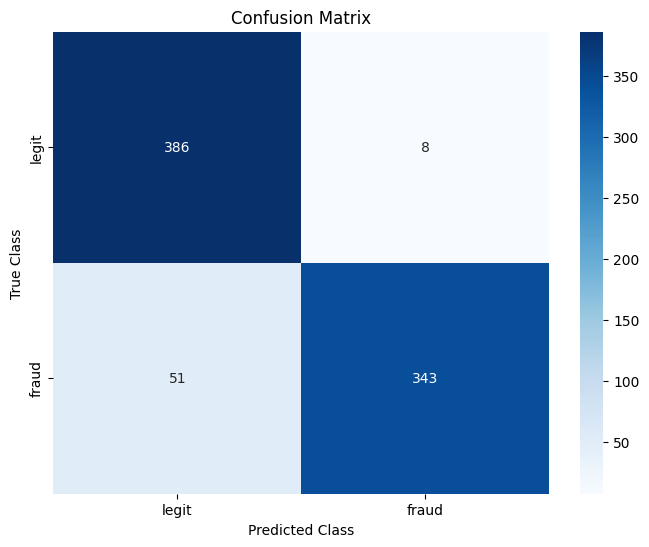

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# Recalculate Y_pred using X_test for consistent sample numbers
Y_pred = reg.predict(X_test)

# Convert predictions to binary if necessary for classification metrics
# Assuming a threshold of 0.5 for binary classification for XGBRegressor output
Y_pred_binary = (Y_pred > 0.5).astype(int)

accuracy = accuracy_score(Y_test, Y_pred_binary)
precision = precision_score(Y_test, Y_pred_binary)
recall = recall_score(Y_test, Y_pred_binary)
f1 = f1_score(Y_test, Y_pred_binary)
mcc = matthews_corrcoef(Y_test, Y_pred_binary)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(Y_test, Y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['legit', 'fraud'], yticklabels=['legit', 'fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [43]:
print(X_train.shape, X_test.shape)

(196, 30) (788, 30)


Both Logistic Regression and XGBoost were evaluated on the same test set to compare their performance on fraud detection. Logistic Regression performed reasonably well, achieving high precision and a solid F1‑score. However, it struggled with recall, missing 52 fraudulent transactions. This is expected because Logistic Regression is a linear model and may not fully capture complex relationships in the data.
XGBoost, on the other hand, delivered stronger overall performance. It achieved higher precision, recall, F1‑score, and MCC. The confusion matrix shows that XGBoost correctly identified more fraudulent transactions while maintaining a low false‑positive rate. Its ability to model nonlinear interactions and handle imbalanced data makes it a more robust choice for fraud detection.
Overall, XGBoost outperformed Logistic Regression across all major evaluation metrics, making it the preferred model for this classification task.
